In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

df = pd.read_csv('Strawberry_Greenhouse.csv')

In [6]:
# 1. Initial Data Inspection
# -----------------------------
print("Initial Dataset Info:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371079 entries, 0 to 371078
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   EnqueuedTimeUtc  371079 non-null  object
 1   deviceId         371079 non-null  object
 2   humidity         371079 non-null  int64 
 3   temparature      371079 non-null  int64 
 4   irTemparature    371079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 14.2+ MB
None

Missing values per column:
 EnqueuedTimeUtc    0
deviceId           0
humidity           0
temparature        0
irTemparature      0
dtype: int64


In [7]:
# 2. Rename Columns (fix typos)
# -----------------------------
df.rename(columns={
    "temparature": "temperature",
    "irTemparature": "irTemperature"
}, inplace=True)

In [10]:
# 3. Convert Timestamp to datetime
# -----------------------------
df["EnqueuedTimeUtc"] = pd.to_datetime(df["EnqueuedTimeUtc"], dayfirst=True)

In [11]:
# 4. Handle Missing Values
# -----------------------------

print("\nAny missing values left?", df.isnull().any().any())


Any missing values left? False


In [ ]:
# 5. Detect & Handle Outliers
# -----------------------------
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [ ]:

# Apply outlier removal
df_clean = df.copy()
for col in ['humidity', 'temperature', 'irTemperature']:
    df_clean = remove_outliers(df_clean, col)

print(f"Rows before outlier removal: {len(df)}")
print(f"Rows after outlier removal: {len(df_clean)}")
print(f"Total rows removed: {len(df) - len(df_clean)}")

Rows before outlier removal: 371079
Rows after outlier removal: 322513
Total rows removed: 48566



Descriptive Statistics (Cleaned Data):
                     EnqueuedTimeUtc       humidity    temperature  \
count                         322513  322513.000000  322513.000000   
mean   2023-10-16 18:19:43.410404608      80.211898      12.416535   
min              2023-02-16 13:41:57      44.000000       0.000000   
25%              2023-10-11 14:46:01      75.000000       9.000000   
50%              2023-11-03 19:05:59      82.000000      12.000000   
75%              2023-11-27 16:13:59      87.000000      16.000000   
max              2023-12-22 09:25:57     100.000000      26.000000   
std                              NaN       9.651488       4.571006   

       irTemperature  
count  322513.000000  
mean       13.129372  
min        -3.000000  
25%         9.000000  
50%        12.000000  
75%        17.000000  
max        29.000000  
std         4.962733  


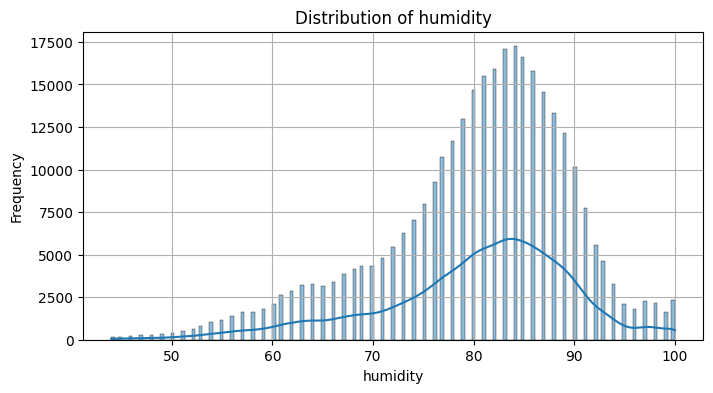

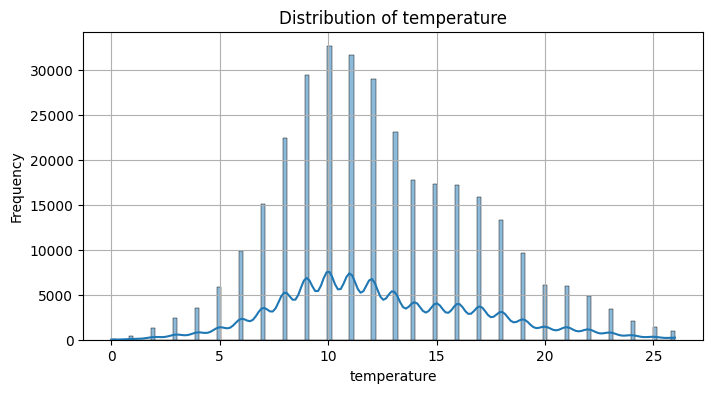

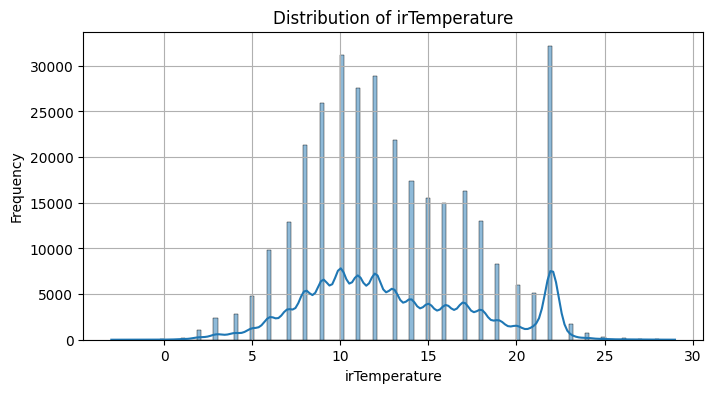

In [ ]:
# 6. Statistical Analysis
# -----------------------------
print("\nDescriptive Statistics (Cleaned Data):")
print(df_clean.describe())

# Distribution plots
for col in ['humidity', 'temperature', 'irTemperature']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
# 7. Save Cleaned Dataset (Optional)
# -----------------------------
df_clean.to_csv("Strawberry_Greenhouse_Cleaned.csv", index=False)

Correlation Matrix:
               humidity  temperature  irTemperature
humidity       1.000000    -0.532575      -0.264703
temperature   -0.532575     1.000000       0.738286
irTemperature -0.264703     0.738286       1.000000


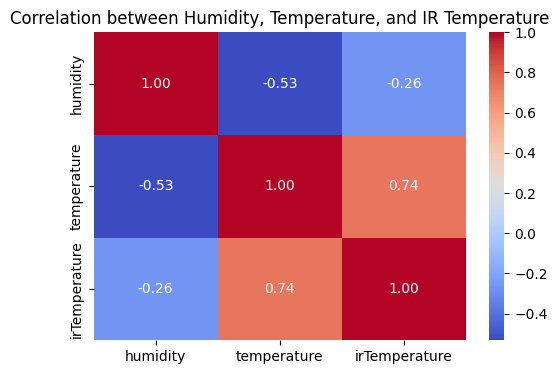

In [ ]:
# Correlation matrix
correlation_matrix = df_clean[['humidity', 'temperature', 'irTemperature']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Humidity, Temperature, and IR Temperature")
plt.savefig('correlation_heatmap.png') # Provide a filename to save the plot
plt.show()


In [ ]:
# Research Questions with Justification
research_questions = [
    {
        "question": "How do temperature and infrared temperature vary throughout the day inside the strawberry greenhouse??",
        "importance": "Maintaining an ideal temperature range can increase fruit yield and quality.."
    },
    {
        "question": "Is there a correlation between humidity and infrared temperature that may suggest transpiration or plant water loss effects in different microclimates of the greenhouse?",
        "importance": "This helps in deciding ventilation or misting strategies for microclimate management.."
    },
    {
        "question": "Do different sensor devices (deviceId) report significantly different environmental conditions, suggesting heterogeneous climate zones within the greenhouse?",
        "importance": "Enhances operational efficiency and ensures uniform plant growth."
    }
]

# Displaying research questions
print("Research Questions and Their Importance:")
for i, rq in enumerate(research_questions, 1):
    print(f"Question {i}: {rq['question']}")
    print(f"Why it matters: {rq['importance']}\n")

Research Questions and Their Importance:
Question 1: How do temperature and infrared temperature vary throughout the day inside the strawberry greenhouse??
Why it matters: Maintaining an ideal temperature range can increase fruit yield and quality..

Question 2: Is there a correlation between humidity and infrared temperature that may suggest transpiration or plant water loss effects in different microclimates of the greenhouse?
Why it matters: This helps in deciding ventilation or misting strategies for microclimate management..

Question 3: Do different sensor devices (deviceId) report significantly different environmental conditions, suggesting heterogeneous climate zones within the greenhouse?
Why it matters: Enhances operational efficiency and ensures uniform plant growth.



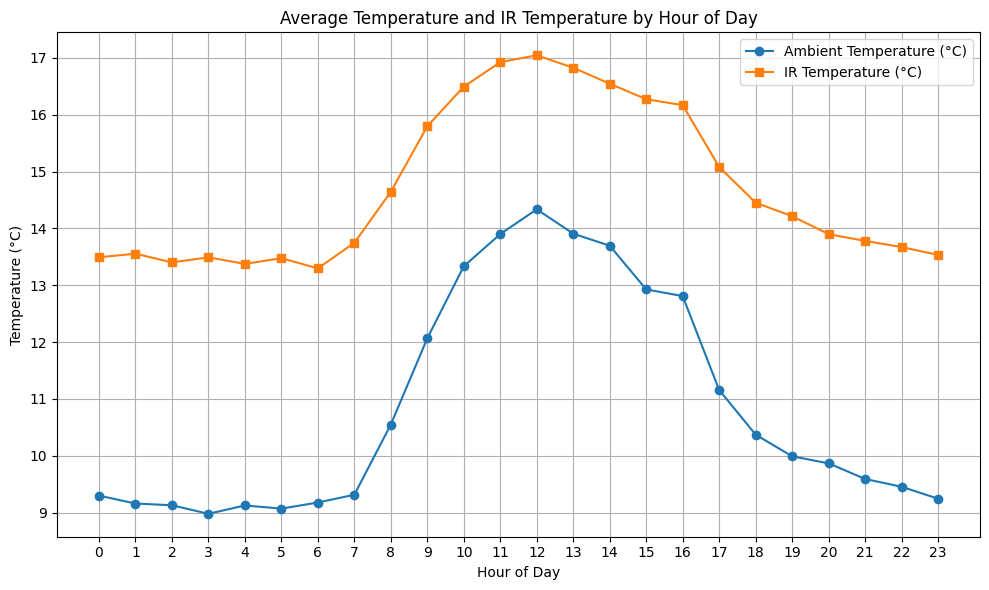

In [ ]:
# Step 1: Extract hour of the day
df_clean = df.copy()
df_clean.rename(columns={
    "temparature": "temperature",
    "irTemparature": "irTemperature"
}, inplace=True)
df_clean["EnqueuedTimeUtc"] = pd.to_datetime(df_clean["EnqueuedTimeUtc"], dayfirst=True)
df_clean["hour"] = df_clean["EnqueuedTimeUtc"].dt.hour

# Step 2: Group by hour and calculate mean temperature and IR temperature
hourly_avg = df_clean.groupby("hour")[["temperature", "irTemperature"]].mean().reset_index()

hourly_avg


# Plotting average temperature and IR temperature by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg["hour"], hourly_avg["temperature"], marker='o', label='Ambient Temperature (°C)')
plt.plot(hourly_avg["hour"], hourly_avg["irTemperature"], marker='s', label='IR Temperature (°C)')

plt.title("Average Temperature and IR Temperature by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Temperature (°C)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


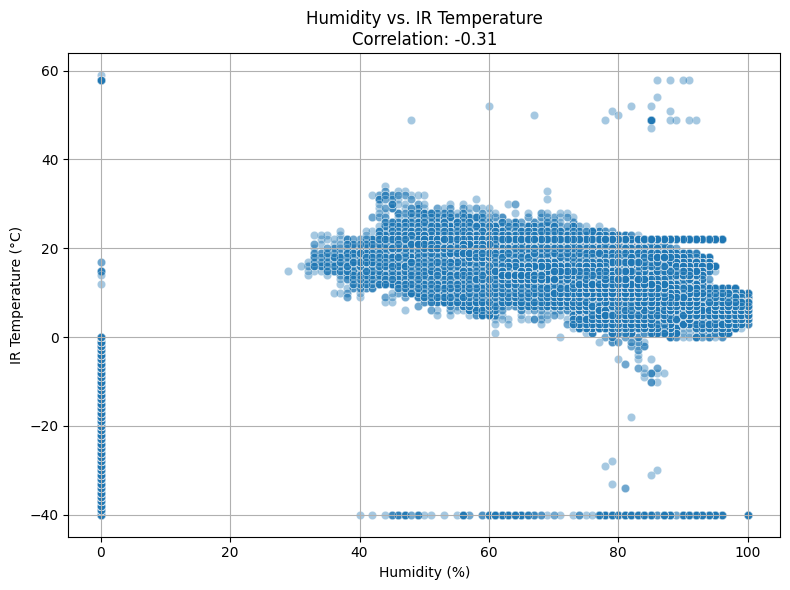

np.float64(-0.31393201486976097)

In [ ]:


# Step 1: Correlation
correlation = df_clean[["humidity", "irTemperature"]].corr().loc["humidity", "irTemperature"]

# Step 2: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="humidity", y="irTemperature", alpha=0.4)
plt.title(f"Humidity vs. IR Temperature\nCorrelation: {correlation:.2f}")
plt.xlabel("Humidity (%)")
plt.ylabel("IR Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

correlation


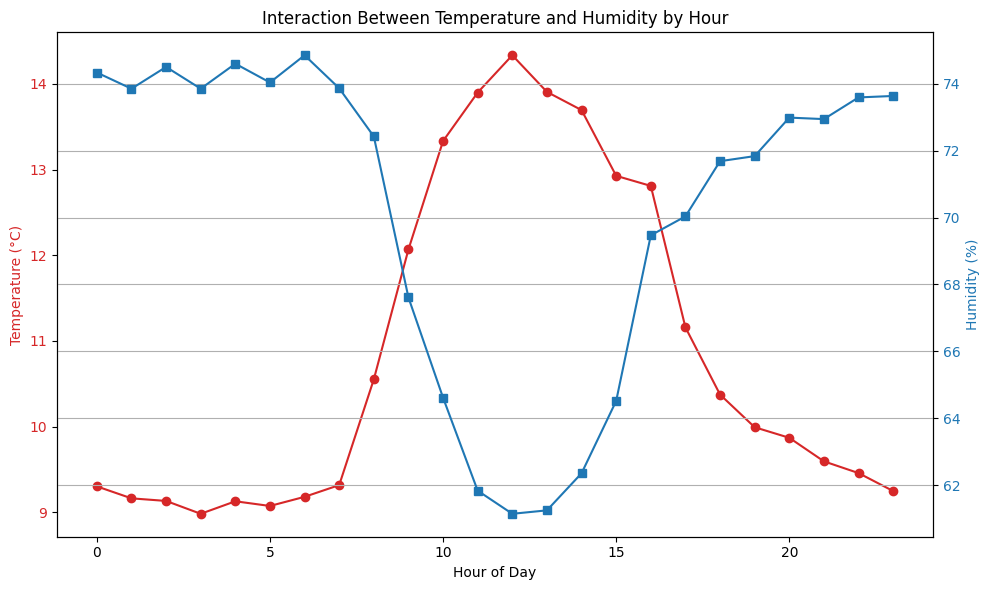

In [ ]:
# Reuse hourly averages from earlier step
hourly_temp_humidity = df_clean.groupby("hour")[["temperature", "humidity"]].mean().reset_index()

# Create dual-axis plot for temperature and humidity
fig, ax1 = plt.subplots(figsize=(10, 6))

# Temperature plot
color = 'tab:red'
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(hourly_temp_humidity['hour'], hourly_temp_humidity['temperature'], color=color, marker='o', label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for humidity
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Humidity (%)', color=color)
ax2.plot(hourly_temp_humidity['hour'], hourly_temp_humidity['humidity'], color=color, marker='s', label='Humidity')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and grid
plt.title("Interaction Between Temperature and Humidity by Hour")
fig.tight_layout()
plt.grid(True)

# Save the figure before showing
import os
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/temp_humidity_by_hour.png")

# Show the plot
plt.show()


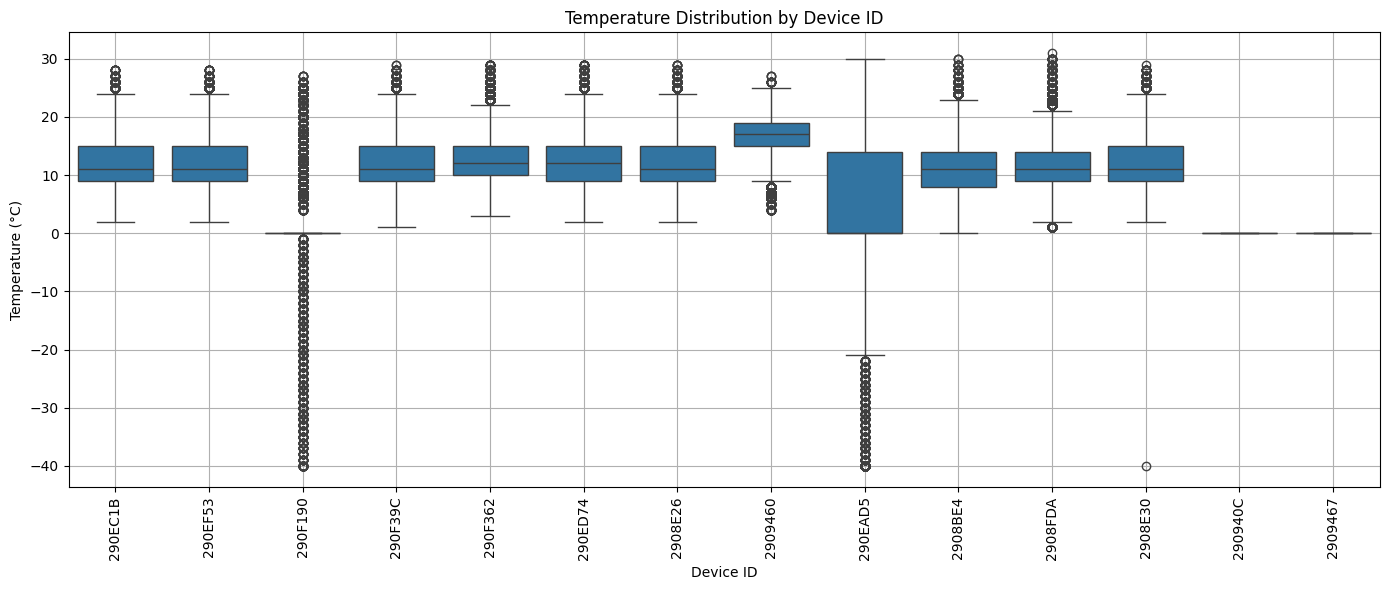

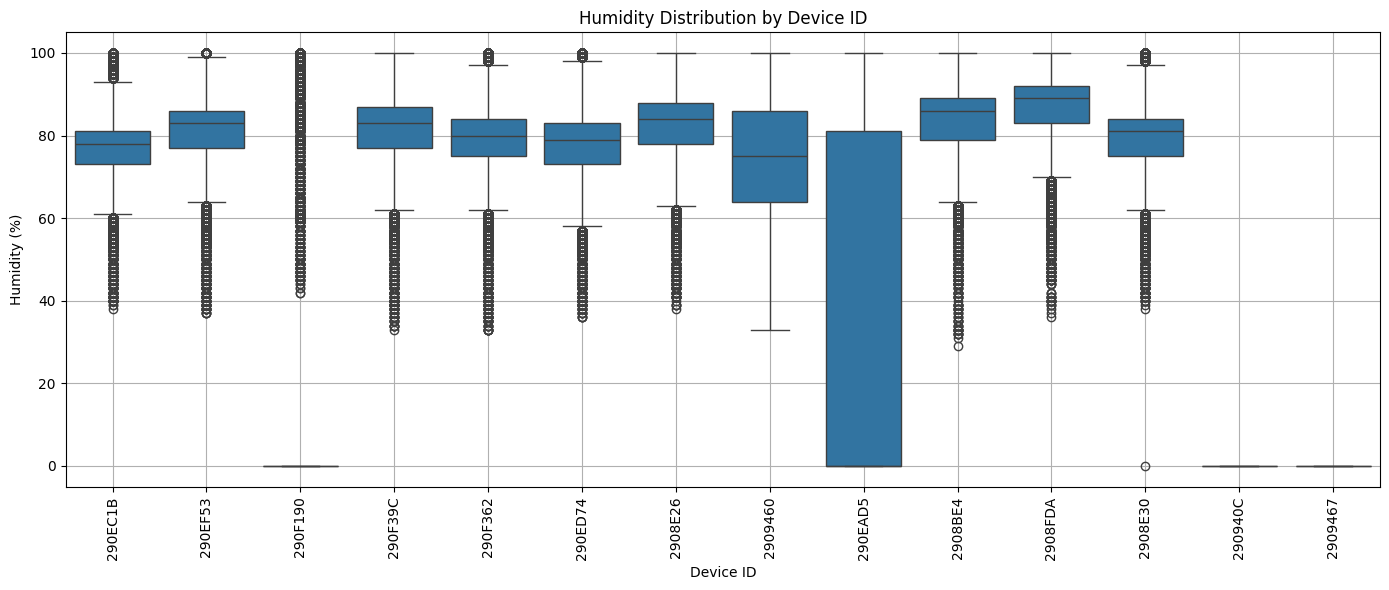

,deviceId,temperature,humidity,irTemperature
5,2909460,16.458209,74.768672,16.226609
12,290F362,12.823789,78.458387,12.637544
9,290ED74,12.468275,77.208174,13.089195
1,2908E26,12.097834,81.826921,11.851927
2,2908E30,12.053529,78.942124,11.761311
13,290F39C,12.030918,80.818402,11.484386
10,290EF53,11.991628,80.705696,11.701401
8,290EC1B,11.870670,76.443795,11.235769
3,2908FDA,11.627776,86.127275,21.002166
0,2908BE4,11.487297,82.993797,11.374482


In [ ]:
# Step 1: Compute average temperature and humidity per device
df_clean=df.copy()
device_stats = df_clean.groupby("deviceId")[["temperature", "humidity", "irTemperature"]].mean().reset_index()

# Step 2: Boxplots of temperature and humidity by device
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean, x="deviceId", y="temperature")
plt.xticks(rotation=90)
plt.title("Temperature Distribution by Device ID")
plt.xlabel("Device ID")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean, x="deviceId", y="humidity")
plt.xticks(rotation=90)
plt.title("Humidity Distribution by Device ID")
plt.xlabel("Device ID")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

device_stats.sort_values(by="temperature", ascending=False)


In [ ]:
import os

# Ensure output directory exists
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Print summary statistics
print("Summary Statistics (Cleaned Data):")
print(df_clean.describe())

# Plot and save distributions
for col in ['humidity', 'temperature', 'irTemperature']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    plot_filename = os.path.join(output_dir, f'{col}_distribution.png')
    plt.savefig(plot_filename)
    print(f"Saved plot for {col} at: {plot_filename}")
    plt.close()

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output directory exists
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Compute correlation matrix
correlation_matrix = df_clean[['humidity', 'temperature', 'irTemperature']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot and save heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Humidity, Temperature, and IR Temperature")
plt.tight_layout()

# Save the heatmap
heatmap_path = os.path.join(output_dir, "correlation_heatmap.png")
plt.savefig(heatmap_path)
print(f"Correlation heatmap saved at: {heatmap_path}")
plt.close()


Correlation Matrix:
               humidity  temperature  irTemperature
humidity       1.000000     0.515778      -0.313932
temperature    0.515778     1.000000      -0.037087
irTemperature -0.313932    -0.037087       1.000000
Correlation heatmap saved at: figures/correlation_heatmap.png
